## Name : L.H.T.V.Jayawardane
## Index : 190274B

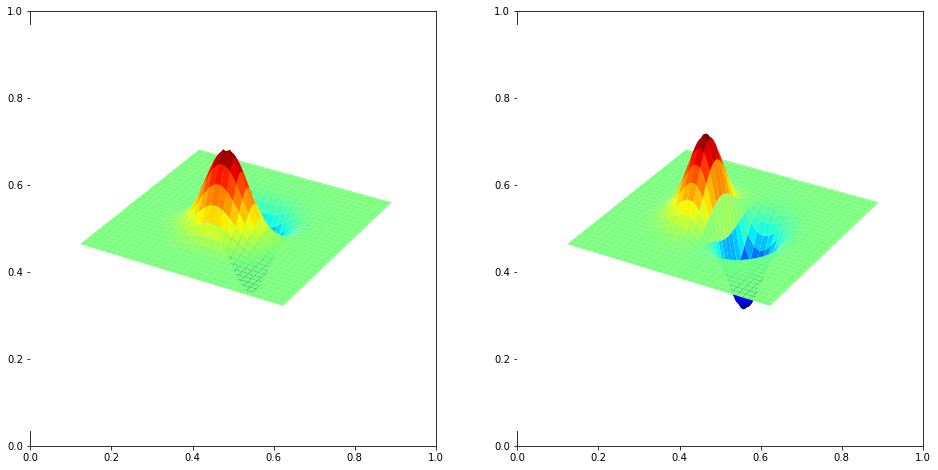

In [4]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')

delta= 0.1
xx,yy=np.meshgrid(np.arange(-5,delta+5,delta),np.arange(-5,delta+5,delta))

sigma=1
g=np.exp(-(xx**2 + yy**2)/(2*sigma**2))
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
g_x=cv.filter2D(g,-1,sobel_v)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
g_y=cv.filter2D(g,-1,sobel_h)

surf1 = ax1.plot_surface(xx,yy,g_x,cmap=cm.jet,linewidth=0,antialiased=True)
surf2 = ax2.plot_surface(xx,yy,g_y,cmap=cm.jet,linewidth=0,antialiased=True)
ax1.axis('off')
ax2.axis('off')
plt.show()


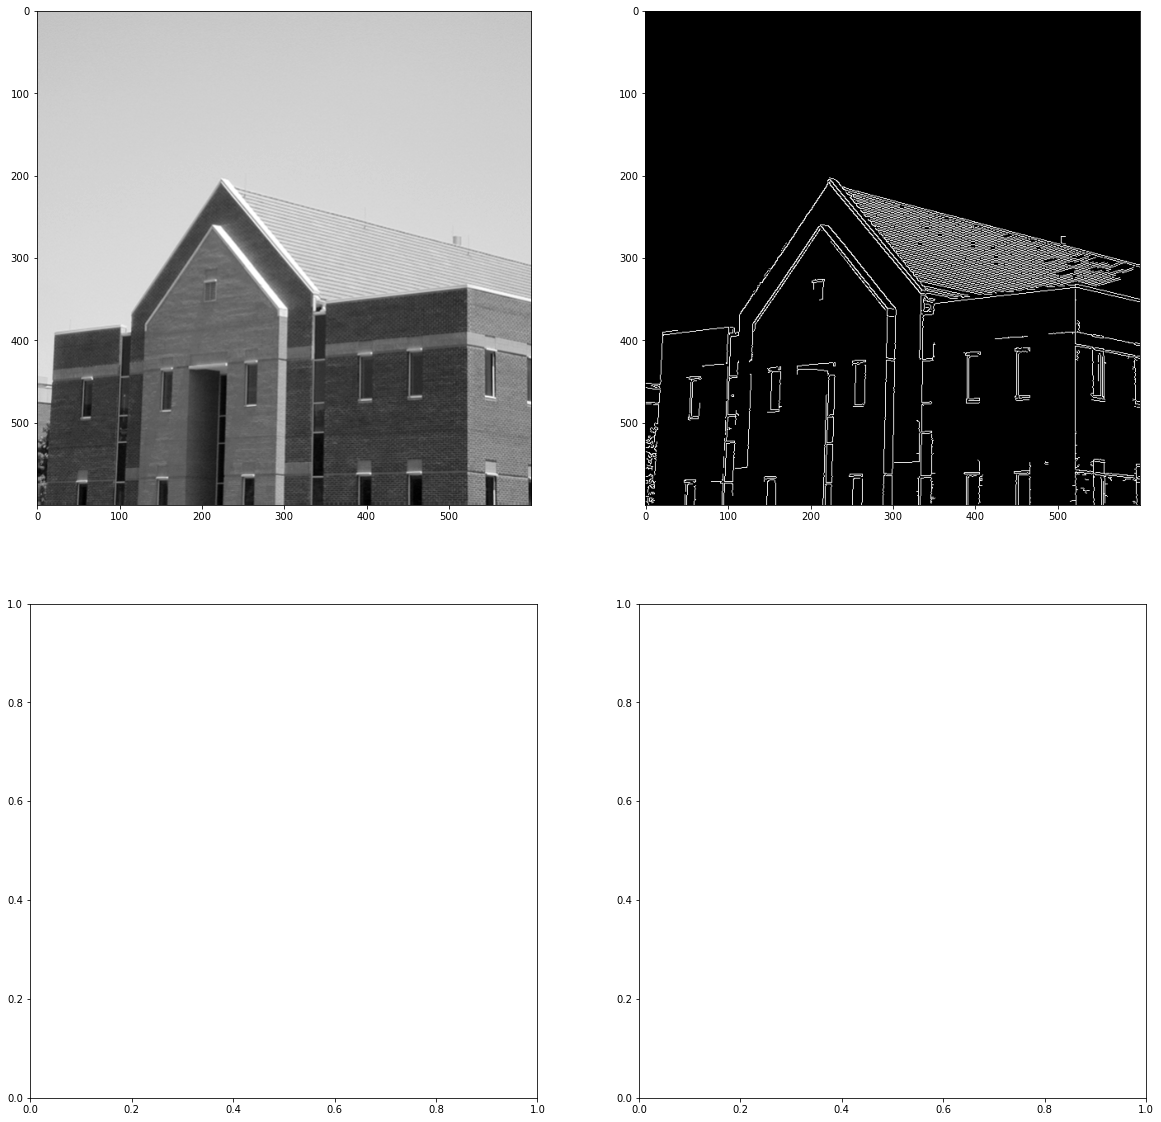

In [13]:
#Q4
img = cv.imread(r'C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\building.tif', cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 100, 200)

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,1].imshow(edges,cmap='gray')
plt.show()


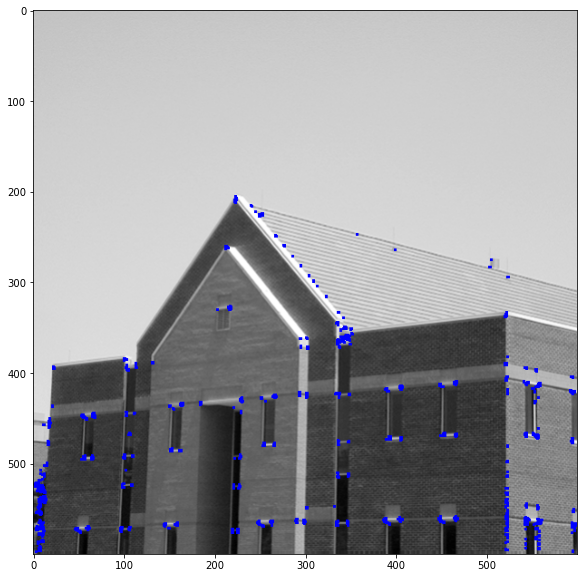

In [11]:
#Q2
img = cv.imread(r'C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\building.tif', cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)
img[dst > 0.01*dst.max()]=[0,0,255]

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)


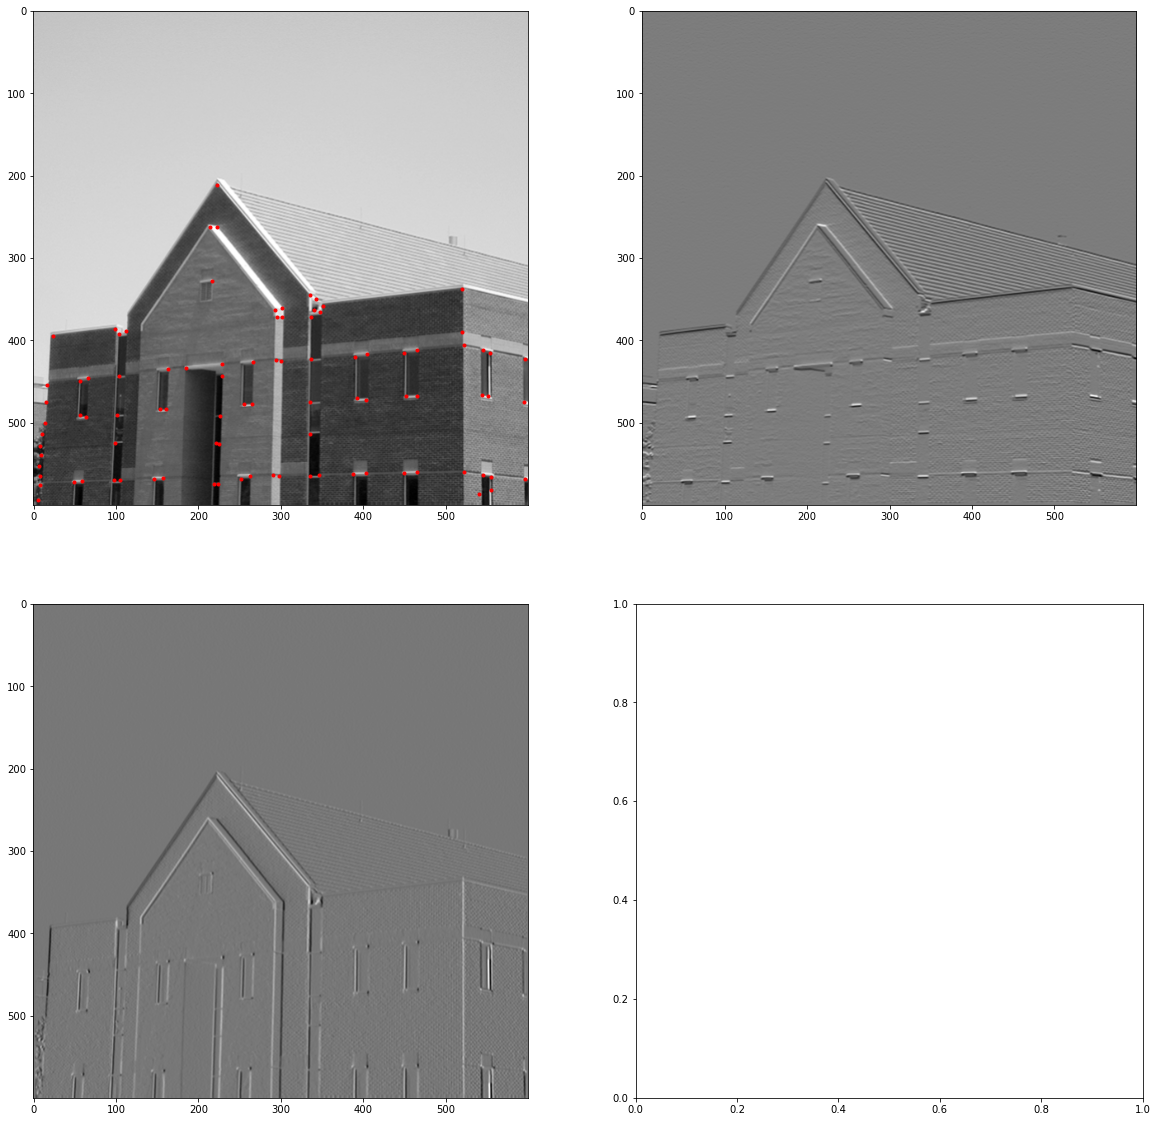

In [17]:
#Q3
from skimage.feature import peak_local_max

im = cv.imread(r'C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\building.tif', cv.IMREAD_COLOR)
assert im is not None

I = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

Ix = cv.filter2D(I,-1,sobel_v)
Iy = cv.filter2D(I,-1,sobel_h)

sigma =3
ksize= 7

m11 = cv.GaussianBlur(Ix*Ix, (ksize,ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize,ksize),sigma)

det=m11*m22 - m12*m21
trace = m11+m22
alpha = 0.04
R=det-alpha*trace**2
R[R<1e8]=0
coordinates = peak_local_max(R,min_distance=2)

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow(im,cmap='gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0], 'r.')
ax[0,1].imshow(Ix+127,cmap='gray')
ax[1,0].imshow(Iy+127,cmap='gray')
plt.show()
